<a href="https://colab.research.google.com/github/Saloni-Raut/ECG-CLASSIFICATION/blob/main/ECG_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/My Drive/MIT_BIH_ECGDatasets/train'
test_dir = '/content/drive/My Drive/MIT_BIH_ECGDatasets/test'


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

x_train = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical"
)
x_test = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical"
)


Found 15381 images belonging to 6 classes.
Found 6905 images belonging to 6 classes.


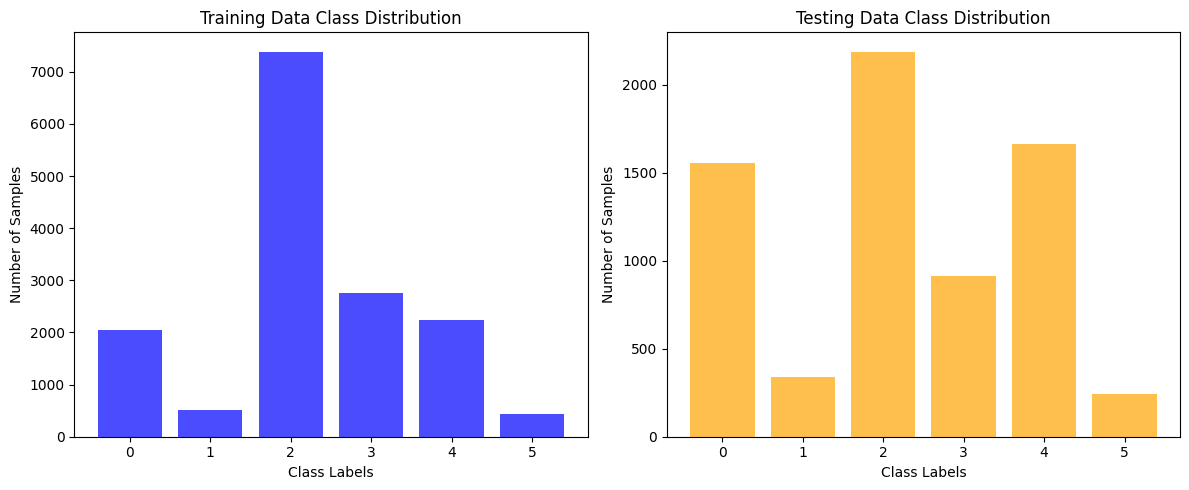

In [ ]:
# Class Distribution for Training Data
train_classes = x_train.classes  # Get the true labels for training data
train_class_distribution = np.bincount(train_classes)

# Class Distribution for Testing Data
test_classes = x_test.classes  # Get the true labels for testing data
test_class_distribution = np.bincount(test_classes)

# Plotting Class Distribution
plt.figure(figsize=(12, 5))

# Training Data Distribution
plt.subplot(1, 2, 1)
plt.bar(range(len(train_class_distribution)), train_class_distribution, color='blue', alpha=0.7)
plt.title('Training Data Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.xticks(range(len(train_class_distribution)))  # Ensure all class labels are shown

# Testing Data Distribution
plt.subplot(1, 2, 2)
plt.bar(range(len(test_class_distribution)), test_class_distribution, color='orange', alpha=0.7)
plt.title('Testing Data Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.xticks(range(len(test_class_distribution)))  # Ensure all class labels are shown

plt.tight_layout()
plt.show()


In [ ]:
# Function to analyze dataset
def analyze_dataset(data_directory):
    # List all classes in the directory
    class_names = os.listdir(data_directory)

    # Initialize a dictionary to hold class sample counts
    class_distribution = {}

    for class_name in class_names:
        class_path = os.path.join(data_directory, class_name)
        if os.path.isdir(class_path):
            # Count the number of samples in each class
            class_count = len(os.listdir(class_path))
            class_distribution[class_name] = class_count

    return class_distribution

<ipython-input-9-19bd3ac34865>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=train_df, palette='Blues')


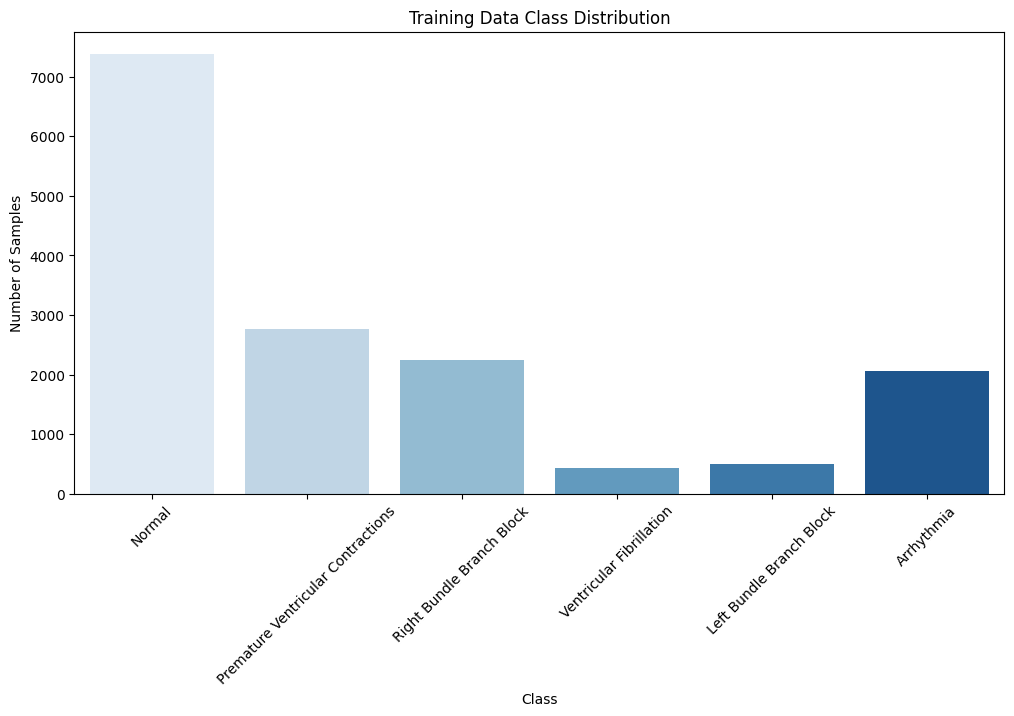

In [ ]:
# Analyze training dataset
train_class_distribution = analyze_dataset(train_dir)
test_class_distribution = analyze_dataset(test_dir)

# Convert distributions to DataFrames for easier manipulation
train_df = pd.DataFrame(list(train_class_distribution.items()), columns=['Class', 'Count'])
test_df = pd.DataFrame(list(test_class_distribution.items()), columns=['Class', 'Count'])

# Plotting Class Distribution for Training Data
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Count', data=train_df, palette='Blues')
plt.title('Training Data Class Distribution')
plt.xticks(rotation=45)
plt.ylabel('Number of Samples')
plt.show()

<ipython-input-11-85a0b372bd6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=test_df, palette='Oranges')


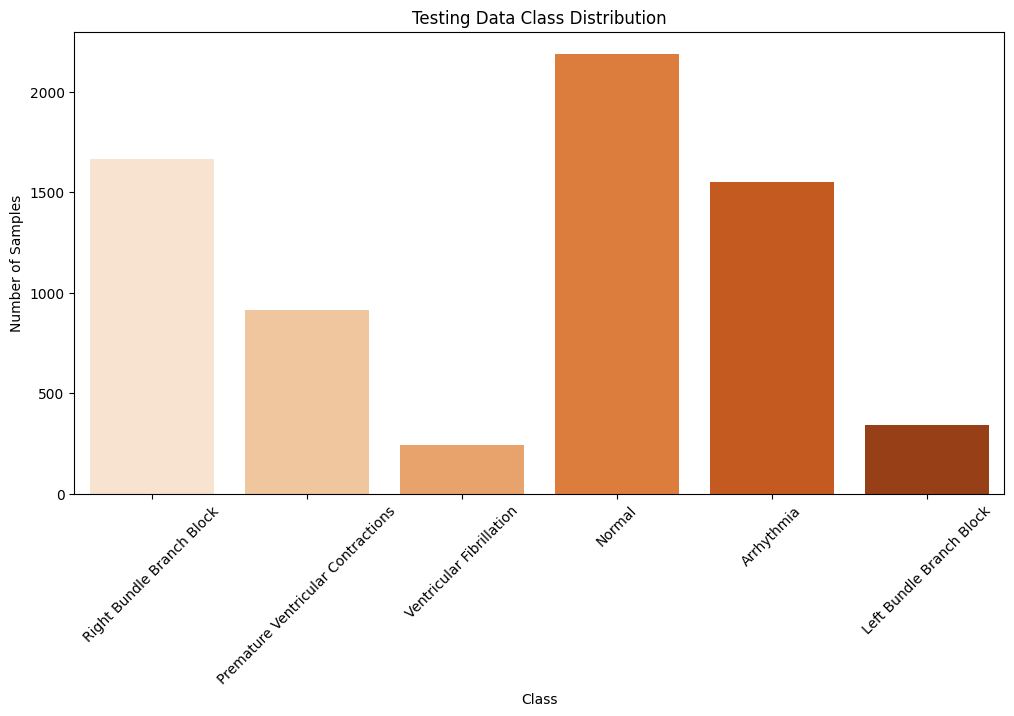

In [ ]:
# Plotting Class Distribution for Testing Data
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Count', data=test_df, palette='Oranges')
plt.title('Testing Data Class Distribution')
plt.xticks(rotation=45)
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(x_train, epochs=12, validation_data=x_test)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


481/481 ━━━━━━━━━━━━━━━━━━━━ 8230s 17s/step - accuracy: 0.7498 - loss: 0.7231 - val_accuracy: 0.8673 - val_loss: 0.3723
Epoch 2/12
481/481 ━━━━━━━━━━━━━━━━━━━━ 180s 344ms/step - accuracy: 0.9688 - loss: 0.1016 - val_accuracy: 0.8911 - val_loss: 0.4190
Epoch 3/12
481/481 ━━━━━━━━━━━━━━━━━━━━ 167s 344ms/step - accuracy: 0.9829 - loss: 0.0550 - val_accuracy: 0.9085 - val_loss: 0.3711
Epoch 4/12
481/481 ━━━━━━━━━━━━━━━━━━━━ 193s 324ms/step - accuracy: 0.9897 - loss: 0.0319 - val_accuracy: 0.9146 - val_loss: 0.4212
Epoch 5/12
481/481 ━━━━━━━━━━━━━━━━━━━━ 161s 332ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9192 - val_loss: 0.5345
Epoch 6/12
481/481 ━━━━━━━━━━━━━━━━━━━━ 164s 338ms/step - accuracy: 0.9972 - loss: 0.0097 - val_accuracy: 0.8882 - val_loss: 0.6118
Epoch 7/12
481/481 ━━━━━━━━━━━━━━━━━━━━ 197s 327ms/step - accuracy: 0.9974 - loss: 0.0081 - val_accuracy: 0.8936 - val_loss: 0.6081
Epoch 8/12
481/481 ━━━━━━━━━━━━━━━━━━━━ 242s 410ms/step - accuracy: 0.9989 - loss: 0.004

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - accuracy: 0.9137 - loss: 0.9729
Test Accuracy: 91.15%


In [ ]:
# Save the model
model.save('ECG_IBM.h5')

In [ ]:
# Predictions for ROC and AUC
y_pred_probs = model.predict(x_test)
y_true = x_test.classes  # True labels
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=6)  # Adjust to number of classes

# Compute ROC curve and AUC
n_classes = y_pred_probs.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

216/216 ━━━━━━━━━━━━━━━━━━━━ 48s 223ms/step


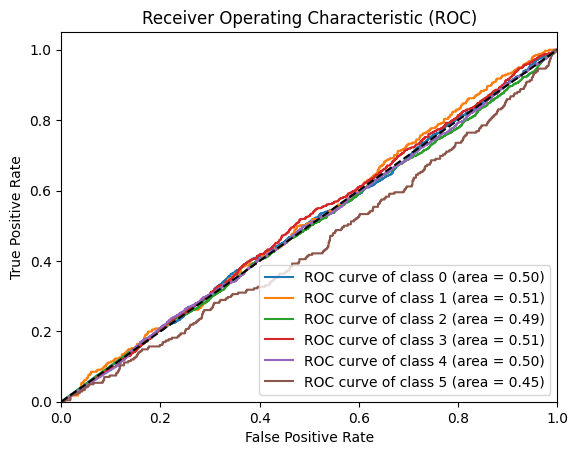

In [ ]:
# Plotting the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Dashed line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

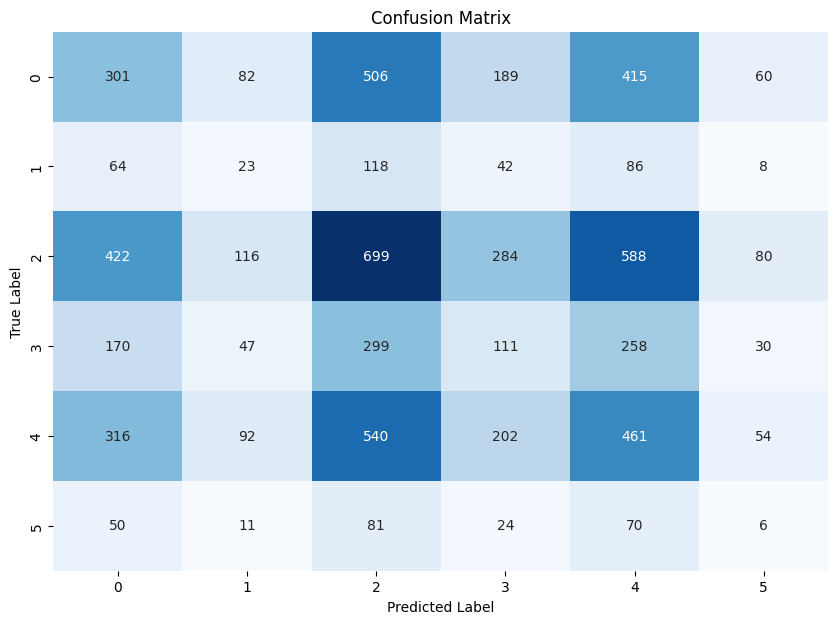

In [ ]:
# Confusion Matrix
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Get the predicted class
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
!tar -zcvf ECG-arrhythmia-classification-model_new.tgz ECG_IBM.h5

ECG_IBM.h5


In [ ]:
ls -1

drive/
ECG-arrhythmia-classification-model_new.tgz
ECG_IBM.h5
sample_data/


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/ECG_IBM.h5')
img=image.load_img(r'/content/drive/My Drive/MIT_BIH_ECGDatasets/train/Arrhythmia/fig_106.png',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = model.predict(x)
y_pred=np.argmax(pred)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


'Arrhythmia '

In [ ]:
index=['Arrhythmia ','left Bundle Branch block','Normal','Premature Ventricular Contraction','Right Bundle Branch Block','Ventricular Fibrillation']
result = str(index[y_pred])
result


'Arrhythmia '